In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import json
import pickle

In [3]:
dataset = pd.read_csv('dataset/synthetic_dataset.csv', index_col = 0)

In [4]:
dict_els = {}
for i in dataset['Composition'].values:
    el_list = re.findall('[A-Z][a-z]?', i)
    for el in el_list:
        if el in dict_els.keys():
            dict_els[el] += 1
        else:
            dict_els[el] = 1

Text(0.5, 1.0, 'Element count in reduced dataset')

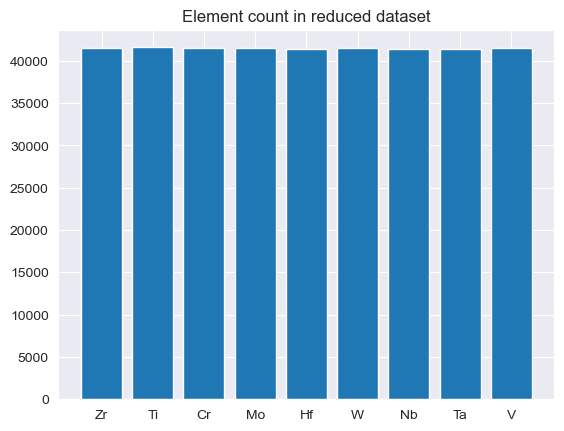

In [5]:
plt.bar(range(len(dict_els.keys())),list(dict_els.values()))
plt.xticks(range(len(dict_els.keys())),list(dict_els.keys()))
plt.title('Element count in reduced dataset')

# Results

In [6]:
with open('results.json','r') as fid:
    results_dict = json.load(fid)

In [7]:
el_list_loc = 'misc/element_order_uts.pkl'
with open(el_list_loc,'rb') as fid:
    el_list = pickle.load(fid)

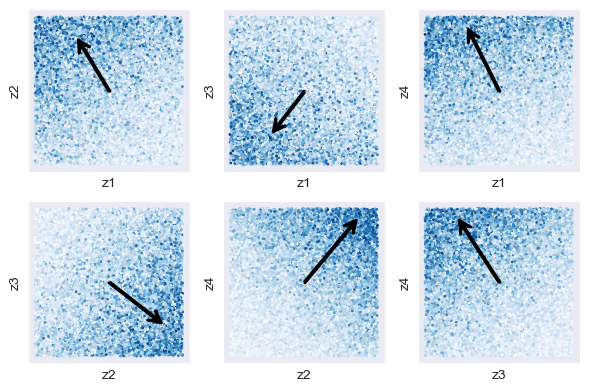

In [8]:
uniform_noise = np.array(results_dict['inverse']['constants']['uniform_noise'])
w_content =  np.array(results_dict['inverse']['constants']['w_content'])
dominant_dir = np.array(results_dict['inverse']['constants']['dominant_dir'])

from itertools import combinations
perm = combinations(np.arange(uniform_noise.shape[1]), 2)  
fig,ax = plt.subplots(2,3,figsize = (6, 4))
ax = ax.flatten()
for k,i in enumerate(list(perm)):
    a,b = i
    ax[k].scatter(uniform_noise[:,a],uniform_noise[:,b],s = 1, c = w_content[:],cmap = 'Blues')
    ax[k].quiver(0.5,0.5,dominant_dir[a],dominant_dir[b],
                 edgecolor='k', facecolor='k',
                 angles='xy', scale_units='xy', scale=0.33,
                 linewidth=2, headwidth=10, headlength=10)
    ax[k].set_xlabel('z{}'.format(a+1))
    ax[k].set_ylabel('z{}'.format(b+1))
    ax[k].set_aspect('equal')
    ax[k].set_xticks([])
    ax[k].set_yticks([])

# plt.suptitle('Direction of W variance in the latent dimensions')
plt.tight_layout()
fig.savefig('W-latent.png', dpi=600)

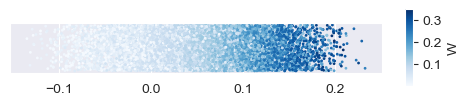

In [9]:
fig, ax = plt.subplots(figsize=(6, 1))
im = ax.scatter(np.dot(uniform_noise, dominant_dir),
                np.random.rand(uniform_noise.shape[0])*0.05,
                s=1, c=w_content, cmap='Blues')
ax.set_yticks([])
cb = plt.colorbar(im, aspect=10)
cb.set_label('W')
ax.set_aspect('equal')
fig.savefig('W-dotproduct.png', dpi=600)

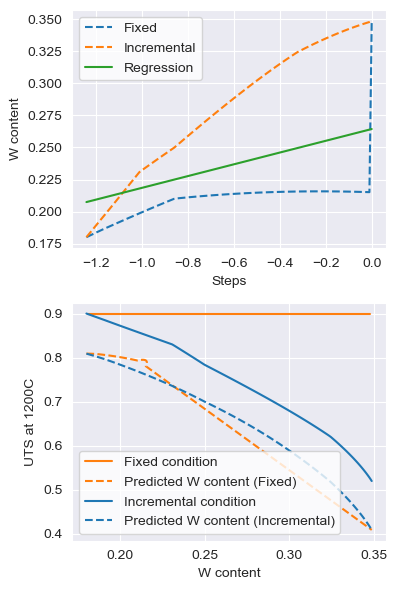

In [145]:
fig,ax = plt.subplots(2, 1, figsize = (4, 6))
ax = ax.ravel()
fixed_bin = [True, False]
for bin in fixed_bin:
        i = int(bin)
        
        if bin:
            c = 'tab:orange'
            label = 'Fixed'
            new_predicted_w = np.array(results_dict['inverse']['fixed']['predicted_w']),
            gen_w_content = np.array(results_dict['inverse']['fixed']['actual_w']),
            g_fake_data_fixed = np.array(results_dict['inverse']['fixed']['g_fake_data']),
            g_fake_data_uts = np.array(results_dict['inverse']['fixed']['g_fake_data_uts']),
            y = np.array(results_dict['inverse']['fixed']['y']),
            n_points = np.array(results_dict['inverse']['fixed']['x'])
            ax[1].axhline(y = y, xmin = 0.05, xmax = 0.95, color = c, label = '{} condition'.format(label))
            
        else:
            c = 'tab:blue'
            label = 'Incremental'
            new_predicted_w = np.array(results_dict['inverse']['inc']['predicted_w']),
            gen_w_content = np.array(results_dict['inverse']['inc']['actual_w']),
            g_fake_data_fixed = np.array(results_dict['inverse']['inc']['g_fake_data']),
            g_fake_data_uts = np.array(results_dict['inverse']['inc']['g_fake_data_uts']),
            y = np.array(results_dict['inverse']['inc']['y']),
            n_points = np.array(results_dict['inverse']['inc']['x'])
            ax[1].plot(np.array(gen_w_content).reshape(-1), np.array(y).reshape(-1), color = c, label = '{} condition'.format(label))
        ax[0].plot(n_points.reshape(-1),np.array(gen_w_content).reshape(-1), linestyle='dashed', label = label)
        ax[1].plot(np.array(gen_w_content).reshape(-1), np.array(g_fake_data_uts).reshape(-1), color = c, linestyle = 'dashed', label = 'Predicted W content ({})'.format(label))
       
ax[0].plot(np.array(n_points).reshape(-1),np.array(new_predicted_w).reshape(-1), label = 'Regression')
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('W content')
ax[1].set_xlabel('W content')
ax[1].set_ylabel('UTS at 1200C')
for a in ax:
    legend = a.legend()
    frame = legend.get_frame()
    frame.set_facecolor('white')

plt.tight_layout()

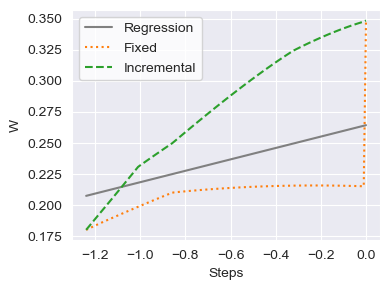

In [178]:
fig,ax = plt.subplots(figsize = (4, 3))

n_points = np.array(results_dict['inverse']['inc']['x'])
new_predicted_w = np.array(results_dict['inverse']['inc']['predicted_w'])
ax.plot(np.array(n_points).reshape(-1),np.array(new_predicted_w).reshape(-1),
        color='grey', label = 'Regression', zorder=1)

fixed_bin = [True, False]
ls = ['dashed', 'dotted']
for bin in fixed_bin:
        i = int(bin)

        if bin:
            c = 'tab:orange'
            label = 'Fixed'
            new_predicted_w = np.array(results_dict['inverse']['fixed']['predicted_w']),
            gen_w_content = np.array(results_dict['inverse']['fixed']['actual_w']),
            g_fake_data_fixed = np.array(results_dict['inverse']['fixed']['g_fake_data']),
            g_fake_data_uts = np.array(results_dict['inverse']['fixed']['g_fake_data_uts']),
            y = np.array(results_dict['inverse']['fixed']['y']),
            n_points = np.array(results_dict['inverse']['fixed']['x'])
        else:
            c = 'tab:green'
            label = 'Incremental'
            new_predicted_w = np.array(results_dict['inverse']['inc']['predicted_w']),
            gen_w_content = np.array(results_dict['inverse']['inc']['actual_w']),
            g_fake_data_fixed = np.array(results_dict['inverse']['inc']['g_fake_data']),
            g_fake_data_uts = np.array(results_dict['inverse']['inc']['g_fake_data_uts']),
            y = np.array(results_dict['inverse']['inc']['y']),
            n_points = np.array(results_dict['inverse']['inc']['x'])
        ax.plot(n_points.reshape(-1),np.array(gen_w_content).reshape(-1), color=c, linestyle=ls[i], label = label)

ax.set_xlabel('Steps')
ax.set_ylabel('W')
legend = ax.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

plt.tight_layout()

In [181]:
lines = [it for it in ax.get_children() if 'Line2D' in str(type(it))]
for l in lines:
    l.set_visible(True)

In [184]:
lines[1].set_visible(False)
lines[2].set_visible(False)
fig.savefig('inverse-fixed-incremental-A.pdf', dpi=300)
lines[1].set_visible(True)
fig.savefig('inverse-fixed-incremental-B.pdf', dpi=300)
lines[2].set_visible(True)
fig.savefig('inverse-fixed-incremental-C.pdf', dpi=300)

In [166]:
fig.savefig('inverse-fixed-incremental.pdf', dpi=300)

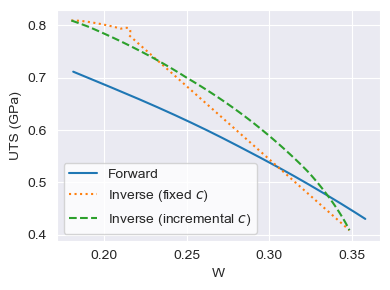

In [198]:
fig,ax = plt.subplots(figsize = (4, 3))
inverse_uts_fixed = results_dict['inverse']['fixed']['g_fake_data_uts']
inverse_uts_inc = results_dict['inverse']['inc']['g_fake_data_uts']
inverse_w_fixed = results_dict['inverse']['fixed']['actual_w']
inverse_w_inc = results_dict['inverse']['inc']['actual_w']
forward_uts = results_dict['forward']['best_cand_uts']
forward_w = results_dict['forward']['w_content']
ax.plot(forward_w,forward_uts, color='tab:blue', label = 'Forward')
ax.plot(inverse_w_fixed, inverse_uts_fixed, color='tab:orange', ls='dotted', label = 'Inverse (fixed $c$)')
ax.plot(inverse_w_inc, inverse_uts_inc, color='tab:green', ls='dashed', label = 'Inverse (incremental $c$)')

ax.set_xlabel('W')
ax.set_ylabel('UTS (GPa)')
# ax.set_title('Variation of UTS with reduction of W',fontsize=14)

legend = plt.legend(fontsize=10, loc='lower left')
frame = legend.get_frame()
frame.set_facecolor('white')

fig.tight_layout()

In [ ]:
fig.savefig('result.pdf', dpi=300)

In [199]:
lines = [it for it in ax.get_children() if 'Line2D' in str(type(it))]
for l in lines:
    l.set_visible(True)

In [200]:
base_name = 'three-results'
lines[1].set_visible(False)
lines[2].set_visible(False)
fig.savefig(f'{base_name}-A.pdf', dpi=300)
lines[1].set_visible(True)
fig.savefig(f'{base_name}-B.pdf', dpi=300)
lines[2].set_visible(True)
fig.savefig(f'{base_name}-C.pdf', dpi=300)

In [77]:
pd.DataFrame(forward_comps, columns=el_list).iloc[-1]

Al    0.000000
C     0.000000
Co    0.000000
Cr    0.201122
Cu    0.000000
Fe    0.000000
Hf    0.180281
Mn    0.000000
Mo    0.058570
Nb    0.064290
Ni    0.000000
Si    0.000000
Sn    0.000000
Ta    0.000000
Ti    0.068993
V     0.000000
Zr    0.068501
W     0.358242
Name: 354, dtype: float64

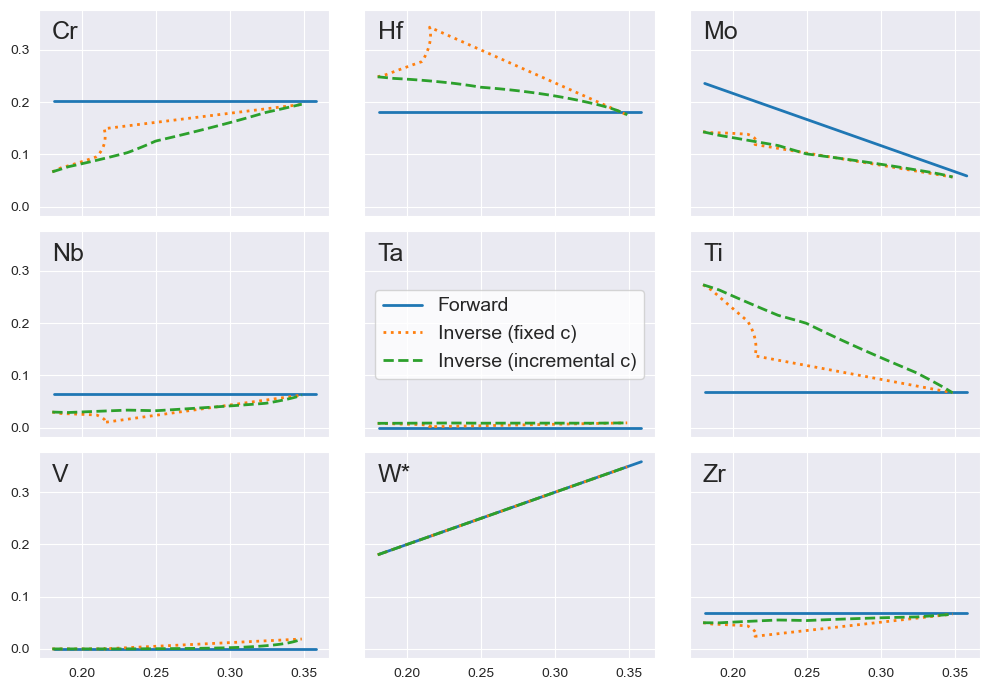

In [62]:
to_consider = results_dict['inverse']['constants']['to_consider']
inverse_comps_fixed = np.array(results_dict['inverse']['fixed']['g_fake_data'])
inverse_comps_inc = np.array(results_dict['inverse']['inc']['g_fake_data'])
forward_comps = np.array(results_dict['forward']['best_cands'])
lw = 2
fig,ax = plt.subplots(3,3, figsize = (10,7), sharex = True, sharey=True)
ax = ax.flatten()
for k, el in enumerate(to_consider):
    i = np.argwhere(el_list==el).item()
    ax[k].plot(forward_w, forward_comps[:,i], label = 'Forward', color='tab:blue', linestyle = 'solid', lw=lw)
    ax[k].plot(inverse_w_fixed, inverse_comps_fixed[:,i], label = 'Inverse (fixed c)', color='tab:orange', linestyle = 'dotted', lw=lw)
    ax[k].plot(inverse_w_inc, inverse_comps_inc[:,i], label = 'Inverse (incremental c)', color='tab:green', linestyle = 'dashed', lw=lw)

    # ax[k].set_title(el)
    if el == 'W':
        label = el + '*'
    else:
        label = el
    ax[k].text(0.18, 0.32, label, fontsize=18)

# fig.suptitle('Variation of atomic fractions of individual elements')

# ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)  # above chart
legend = ax[4].legend(loc='center', ncol=1, fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.tight_layout()

In [63]:
fig.savefig('elements_inverse.pdf')

In [37]:
import pymatgen.core as mg

def decode(vec, elem_list, thresh=0.03):
    vec[vec < thresh] = 0
    vec /= vec.sum()
    comp = ''
    for i, x in enumerate(vec):
        if x >= thresh:
            comp += elem_list[i] + '{:.2f} '.format(x)
    return mg.Composition(comp)

x = np.array( results_dict['inverse']['inc']['g_fake_data'] )
y = np.array( results_dict['inverse']['inc']['g_fake_data_uts'] )

for idx in range(5):
    print( y[idx], decode(x[idx], el_list))

[0.80897689] Cr0.07 Hf0.25 Mo0.14 Nb0.03 Ti0.28 Zr0.05 W0.18
[0.80652881] Cr0.07 Hf0.26 Mo0.15 Ti0.28 Zr0.05 W0.19
[0.80403465] Cr0.07 Hf0.26 Mo0.15 Ti0.28 Zr0.05 W0.19
[0.80149549] Cr0.08 Hf0.26 Mo0.14 Ti0.28 Zr0.05 W0.19
[0.79890978] Cr0.08 Hf0.26 Mo0.14 Ti0.28 Zr0.05 W0.2


In [27]:
to_consider = results_dict['inverse']['constants']['to_consider']
to_consider

['Cr', 'Hf', 'Mo', 'Nb', 'Ta', 'Ti', 'V', 'W', 'Zr']

In [44]:
forward_comps = np.array(results_dict['forward']['best_cands'])
decode(forward_comps[-1], el_list)

Comp: Hf0.18 Zr0.07 Ti0.07 Nb0.06 Cr0.2 Mo0.06 W0.36

In [46]:
np.linalg.norm(results_dict['inverse']['inc']['g_fake_data'][0] - forward_comps[-1])

0.324141034420497

In [57]:
def encode(value_dict, el_list):
    comp = np.zeros(len(el_list))
    for i, el in enumerate(el_list):
        if el in value_dict:
            comp[i] = value_dict[el]
    return comp / np.sum(comp)

ea = dict(Cr=0.15, Hf=0.25, Mo=0.20, Nb=0.05, Ti=0.17, W=0.17)
bo = dict(Hf=0.31, Mo=0.23, Ti=0.31, W=0.15)

ea_w = dict(Cr=17, Hf=26, Mo=21, Ti=18, W=19)
bo_w = dict(Cr=18, Hf=21, Mo=18, Nb=7, Ti=18, W=18)

np.linalg.norm( encode(ea_w, el_list) - forward_comps[-1])

0.2811238489835273

In [60]:
results_dict['forward']['best_cand_uts'][-1]

0.43047088384628296